In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [2]:
train_images.shape

(60000, 28, 28)

In [3]:
train_labels.shape

(60000,)

In [4]:
from keras import models, layers


network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28, )))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [5]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [6]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [7]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.2539 - accuracy: 0.9264
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.1047 - accuracy: 0.9688
Epoch 3/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0697 - accuracy: 0.9794
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0501 - accuracy: 0.9854
Epoch 5/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0381 - accuracy: 0.9885


In [8]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0708 - accuracy: 0.9783
test_acc 0.9782999753952026


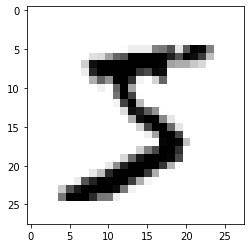

In [9]:
import matplotlib.pyplot as plt

plt.imshow(train_images.reshape(-1, 28, 28)[0], cmap=plt.cm.binary)
plt.show()

## 발표에서 제외해도 될 것 같은 부분
numpy조작은 인공지능 외적인 것임으로 굳이 들어갈 필요는 없을 것 같습니다.  


## 발표에 들어가면 좋을 것 같은 부분


#### 텐서의 실제 사례
- 벡터 데이터
- 시계열 데이터
- 이미지
- 동영상

#### 텐서연산
텐서연산? keras의 내부에서 실제로 연산이 어떻게 이루어지는지 예시를 들어준 것 같은데 나중에 실제로 어떠한 모델을 구현할때 안다면 도움이 될 때가 있을 것 같다고는 생각 합니다. (근데 발표에 넣기는 어려워 보입니다)

#### 확률적 경사하강법 ~ 역전파 알고리즘
우선 발표를 듣는사람이 거의 이러한 기본 지식이 있으신 분들이니 가볍게 설명해도 될 것 같아요.

* 주요키워드
    * localminimum에 빠지지 않게 하기위한 optimizer와 momentum
    * 경사 하강법 (코드로 경사하강법이 진행되는 것을 보여주는것을 해보면 좋을 것 같습니다)
    * 등등
    



In [10]:
# 응용 1 
# 최적화 과정 시각화

In [13]:
import matplotlib.pyplot as plt
from keras import models, layers, losses
import numpy as np

network = models.Sequential()
network.add(layers.Dense(1))

network.compile(optimizer='SGD', loss='mean_squared_error')

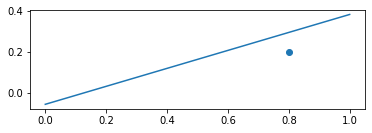

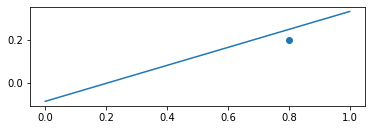

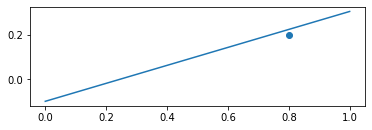

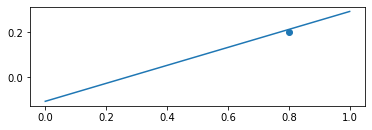

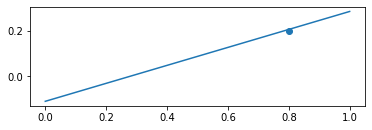

In [14]:
x = np.array([[0.8]])
y = np.array([[0.2]])

for i in range(5):
    l = np.linspace(0,1,100)
    network.fit(x, y, epochs=20, verbose=0)

    plt.subplot(211)
    plt.scatter(x, y)
    plt.plot(l, network.predict(l))
    plt.show()
